In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv('billboard_hits_with_features.csv',index_col=0)
df.tail()

,Year,Songs,Artists,Track_ID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
395,2017,Havana,Camila Cabello featuring Young Thug,spotify:track:1rfofaqEpACxVEHIZBJe6W,0.18400,0.765,217307,0.523,0.000036,2,0.1320,-4.333,1,0.0300,104.988,4,0.394
396,2017,What Lovers Do,Maroon 5 featuring SZA,spotify:track:2j5hsQvApottzvTn4pFJWF,0.07880,0.799,199849,0.597,0.000006,5,0.1000,-5.131,0,0.0611,110.001,4,0.419
397,2017,Do Re Mi,Blackbear,spotify:track:3Q3myFA7q4Op95DOpHplaY,0.00419,0.742,212027,0.599,0.000010,8,0.1260,-6.256,1,0.0465,110.977,3,0.154
398,2017,Look at Me!,XXXTentacion,spotify:track:7floNISpH8VF4z4459Qo18,0.25900,0.763,126346,0.726,0.000000,1,0.0976,-6.405,1,0.2820,139.059,4,0.349
399,2017,The Fighter,Keith Urban featuring Carrie Underwood,spotify:track:5OUSPcqhYTOzpbXzoEvKim,0.03040,0.681,184040,0.845,0.000000,11,0.1970,-5.147,0,0.0525,132.023,4,0.761


In [33]:
df.describe()

,Year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2015.500000,0.161718,0.673207,222718.027500,0.652191,0.003445,5.582500,0.160211,-5.991562,0.600000,0.102910,121.426788,3.985000,0.497096
std,1.119434,0.201594,0.131688,32163.630156,0.159328,0.027300,3.642989,0.121586,2.099015,0.490511,0.097140,28.316312,0.199686,0.218114
min,2014.000000,0.000180,0.254000,126346.000000,0.056500,0.000000,0.000000,0.021000,-17.969000,0.000000,0.027500,72.997000,3.000000,0.038700
25%,2014.750000,0.023425,0.589000,200773.500000,0.554500,0.000000,2.000000,0.090200,-7.020250,0.000000,0.042075,99.953000,4.000000,0.338250
50%,2015.500000,0.077550,0.680500,220313.000000,0.673000,0.000000,6.000000,0.116500,-5.686500,1.000000,0.061650,119.934500,4.000000,0.486500
75%,2016.250000,0.225000,0.767000,237747.250000,0.774000,0.000010,9.000000,0.178250,-4.666750,1.000000,0.124500,139.955000,4.000000,0.657250
max,2017.000000,0.965000,0.965000,343150.000000,0.963000,0.407000,11.000000,0.760000,-2.255000,1.000000,0.737000,205.958000,5.000000,0.966000


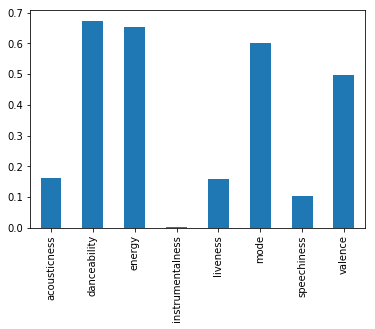

In [5]:
df_features = df.drop(['Year','tempo','duration_ms','key','loudness','time_signature'], axis=1)
df_features.mean().plot.bar()
plt.show()

Mean loudness: -5.991562499999999
Mean danceability: 0.6732074999999996
Mean energy: 0.6521912499999999
Mean valence: 0.4970957500000002
Mean acousticness: 0.16171847749999993
Mean instrumentalness: 0.003445246650000001
Mean speechiness: 0.10291025000000012
Mean liveness: 0.16021100000000005
Mean mode: 0.6


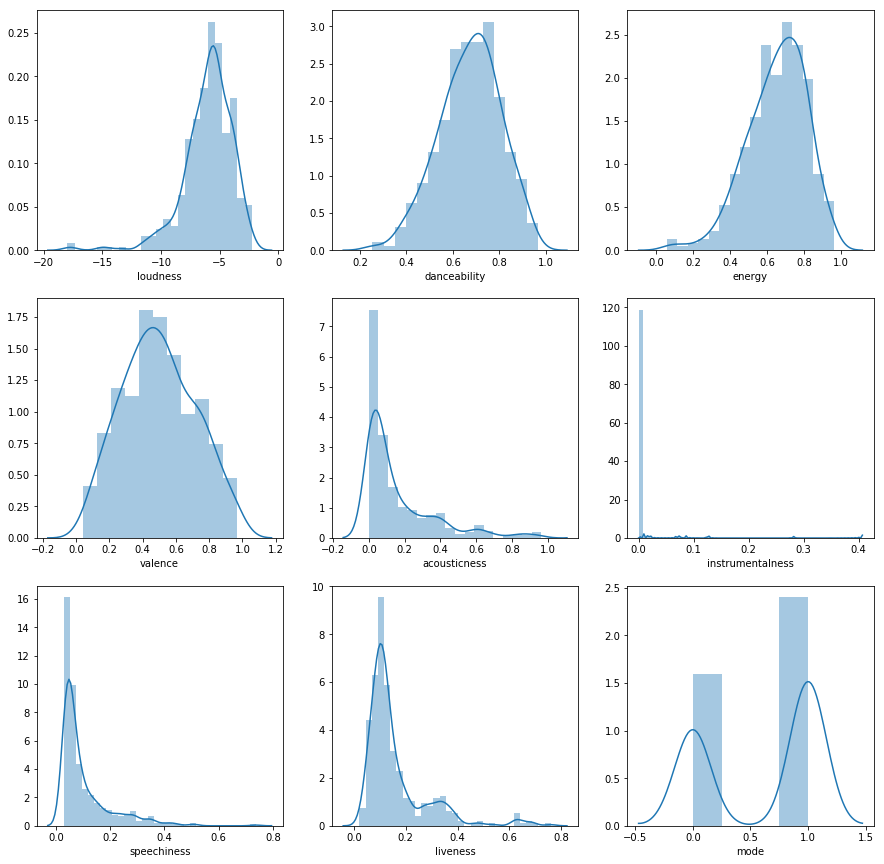

In [6]:
# mean plots
print("Mean loudness:", df['loudness'].mean())
print("Mean danceability:", df_features['danceability'].mean())
print("Mean energy:", df_features['energy'].mean())
print("Mean valence:", df_features['valence'].mean())
print("Mean acousticness:", df_features['acousticness'].mean())
print("Mean instrumentalness:", df_features['instrumentalness'].mean())
print("Mean speechiness:", df_features['speechiness'].mean())
print("Mean liveness:", df_features['liveness'].mean())
print("Mean mode:", df_features['mode'].mean())

fig, axs = plt.subplots(3,3, figsize=(15,15))
sns.distplot(df['loudness'], ax=axs[0][0])
sns.distplot(df_features['danceability'], ax=axs[0][1])
sns.distplot(df_features['energy'], ax=axs[0][2])
sns.distplot(df_features['valence'], ax=axs[1][0])
sns.distplot(df_features['acousticness'], ax=axs[1][1])
sns.distplot(df_features['instrumentalness'], ax=axs[1][2])
sns.distplot(df_features['speechiness'], ax=axs[2][0])
sns.distplot(df_features['liveness'], ax=axs[2][1])
sns.distplot(df_features['mode'], ax=axs[2][2])

plt.show()

Mean bpm: 121.4267875


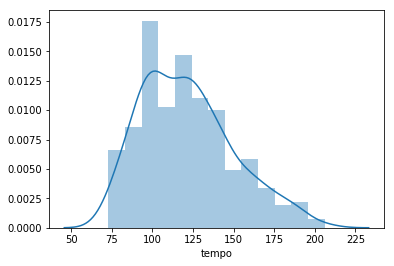

In [7]:
print("Mean bpm:", df['tempo'].mean())
sns.distplot(df['tempo'])
plt.show()

_Larghissimo_ – very, very slow (24 bpm and under)<br>
_Adagissimo_ – very slowly<br>
_Grave_ – very slow (25–45 bpm)<br>
_Largo_ – broadly (40–60 bpm)<br>
_Lento_ – slowly (45–60 bpm)<br>
_Larghetto_ – rather broadly (60–66 bpm)<br>
_Adagio_ – slowly with great expression (66–76 bpm)<br>
_Adagietto_ – slower than andante (72–76 bpm) or slightly faster than adagio (70–80 bpm)<br>
_Andante_ – at a walking pace (76–108 bpm)<br>
_Andantino_ – slightly faster than andante (80–108 bpm)<br>
_Marcia moderato_ – moderately, in the manner of a march (83–85 bpm)<br>
_Andante moderato_ – between andante and moderato (92–112 bpm)<br>
_Moderato_ – at a moderate speed (108–120 bpm)<br>
_Allegretto_ – by the mid 19th century, moderately fast (112–120 bpm)<br>
_Allegro moderato_ – close to, but not quite allegro (116–120 bpm)<br>
__*Allegro*– fast, quickly, and bright (120–156 bpm)<br>__
_Vivace_ – lively and fast (156–176 bpm)<br>
_Vivacissimo_ – very fast and lively (172–176 bpm)<br>
_Allegrissimo or Allegro vivace_ – very fast (172–176 bpm)<br>
_Presto_ – very, very fast (168–200 bpm)<br>
_Prestissimo_ – even faster than presto (200 bpm and over)<br>

Mean duration: 3.711967125


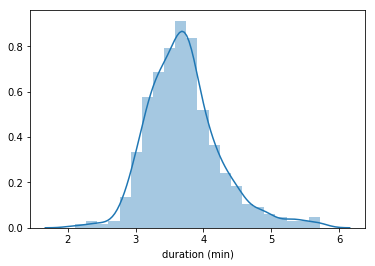

In [8]:
print("Mean duration:", df['duration_ms'].mean()/60000)
sns.distplot(df['duration_ms']/60000) #factor in to minutes
plt.xlabel('duration (min)')
plt.show()

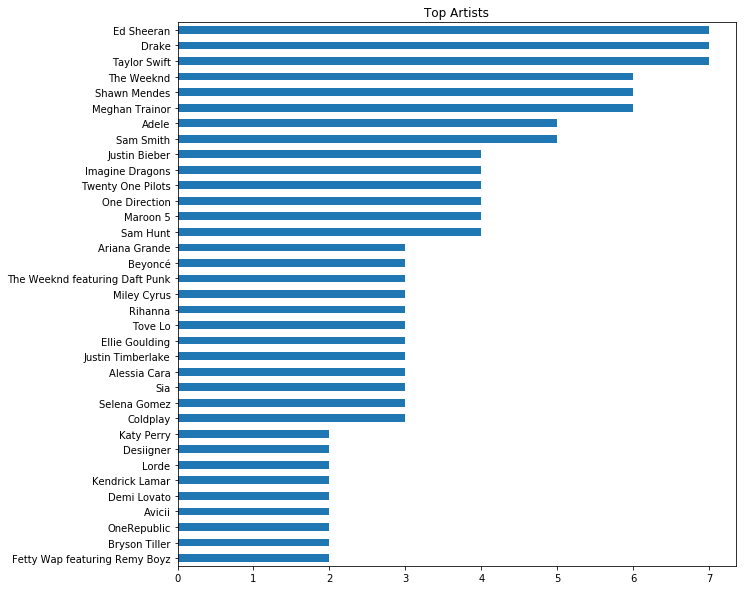

In [87]:
plt.figure(figsize=(10,10))
df['Artists'].value_counts()[:35].sort_values(ascending=True).plot(kind='barh') # 3 or more hits in 4 years
plt.title("Top Artists")
plt.show()

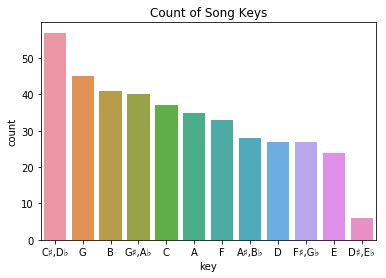

In [11]:
# key
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
df['key'] = df['key'].map(key_mapping)

sns.countplot(x = 'key', data=df, order=df['key'].value_counts().index)
plt.title("Count of Song Keys")
plt.show()

The key of C# has the most number of top hits in the last 4 years. You don't usually hear songs in C#

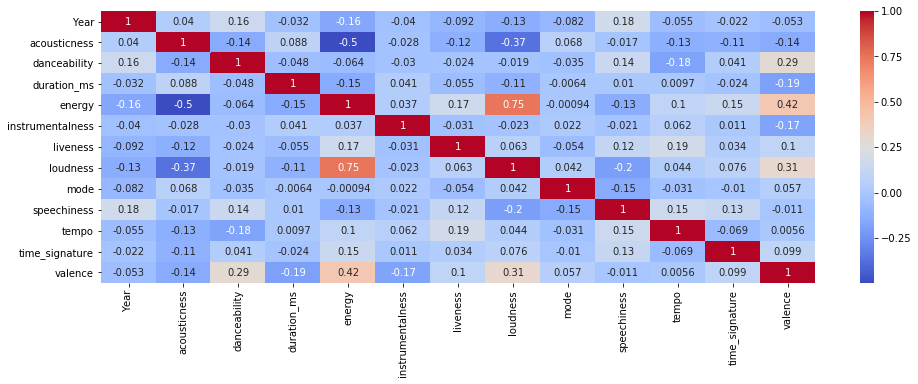

In [13]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

Strong positive correlation between loudness and energy and negative correlation between energy and acousticness also which intuitively makes sense. Otherwise, not much strong correlations.

In [72]:
dfm= df[df['Artists'] == 'Maroon 5']
dfm

,Year,Songs,Artists,Track_ID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
28,2014,Maps,Maroon 5,spotify:track:4gbVRS8gloEluzf0GzDOFc,0.01830,0.745,189959,0.714,0.0,1,0.0636,-5.501,0,0.0302,120.025,4,0.853
61,2014,Animals,Maroon 5,spotify:track:2bL2gyO6kBdLkNSkxXNh6x,0.00018,0.465,231013,0.744,0.0,4,0.6800,-6.429,0,0.0635,189.928,4,0.339
104,2015,Sugar,Maroon 5,spotify:track:2iuZJX9X9P0GKaE93xcPjk,0.05200,0.751,235493,0.768,0.0,1,0.0848,-7.089,1,0.0346,120.084,4,0.881
145,2015,Animals,Maroon 5,spotify:track:2bL2gyO6kBdLkNSkxXNh6x,0.00018,0.465,231013,0.744,0.0,4,0.6800,-6.429,0,0.0635,189.928,4,0.339


In [76]:
dfn = df.replace(to_replace= 'featuring.*', value='', regex=True)

In [77]:
dfn = df.replace(to_replace='. and .*', value='',regex=True)

In [80]:
dfn.tail(200)

,Year,Songs,Artists,Track_ID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
200,2016,Love Yourself,Justin Bieber,spotify:track:50kpGaPAhYJ3sGmk6vplg0,0.85600,0.607,233720,0.376,0.000000,4,0.2850,-9.954,1,0.4530,102.541,4,0.545
201,2016,Sorry,Justin Bieber,spotify:track:09CtPGIpYB4BrO8qb1RGsF,0.08650,0.605,200787,0.768,0.000000,0,0.3080,-3.724,0,0.0476,100.209,4,0.414
202,2016,One Dance,Drake,spotify:track:1zi7xx7UVEFkmKfv06H8x0,0.00842,0.796,173987,0.610,0.002860,1,0.3510,-5.857,1,0.0516,103.990,4,0.391
203,2016,Work,Rihanna,spotify:track:32lmL4vQAAotg6MrJnhlQZ,0.06440,0.667,219320,0.538,0.000000,11,0.0928,-6.294,1,0.0953,91.296,4,0.527
204,2016,Stressed Out,Twenty One Pilots,spotify:track:3CRDbSIZ4r5MsZ0YwxuEkn,0.04620,0.734,202333,0.637,0.000023,4,0.0602,-5.677,0,0.1410,169.977,4,0.648
205,2016,Panda,Desiigner,spotify:track:275a9yzwGB6ncAW4SxY7q3,0.02350,0.720,247867,0.748,0.000000,10,0.3690,-5.522,0,0.3930,145.220,4,0.246
206,2016,Hello,Adele,spotify:track:4sPmO7WMQUAf45kwMOtONw,0.33600,0.481,295493,0.451,0.000000,5,0.0872,-6.095,0,0.0347,157.966,4,0.289
207,2016,Don't Let Me Down,The Chainsmokers,spotify:track:1i1fxkWeaMmKEB4T7zqbzK,0.15700,0.532,208373,0.869,0.005080,11,0.1360,-5.094,1,0.1720,159.803,4,0.422
208,2016,Can't Stop the Feeling!,Justin Timberlake,spotify:track:1WkMMavIMc4JZ8cfMmxHkI,0.01060,0.669,237547,0.832,0.000000,0,0.0968,-5.720,1,0.0682,113.035,4,0.700
209,2016,Closer,The Chainsmokers,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.41400,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661
